<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Spectral_analysis_in_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral analysis in time series

When doing time series analysis, it's really common to do a spectral analysis.

Let's do:
- some time series simulation using AR (auto regressing) models;
- work on Fourier transform, implementing from scratch one of the most important algorithm in information communications technology and signal processing;
- learn about the differences between "static" FFT (fast fourier transform) and Welch's method.

# Simulating an AR (Auto Regressor) process / model

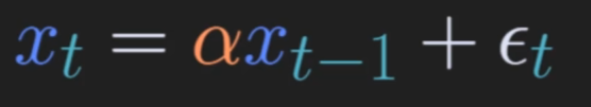

This is an equation that simulates AR(1) process. "(1)" means that we just have one time point and one weighting factor.

The data time series at time point "t" is equal to some past version of itself, multiplied by (or scaled by) some weighting factor (here is alpha, but in other cases can be "w" or phee, etc) + Epsilon (random distributed noise, people call it innovation factor or novelty factor, cause introduce additional variability into the signal).

This is the generalized formula, and it's our goal:

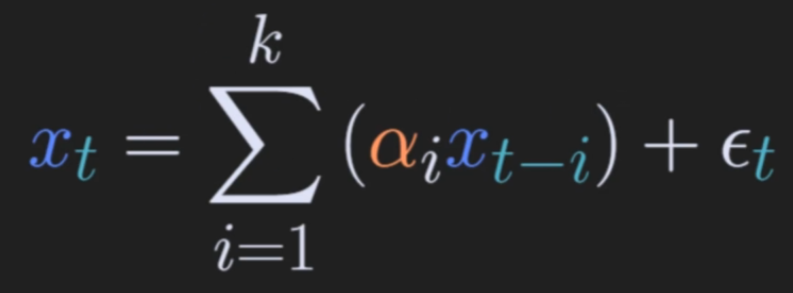

# Generating AR(2) process, getting a time series for 200 time points

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
alpha = np.array([-.6, .9])
k = len(alpha)
N = 200
x = np.zeros(N)

# adding some sine wave aspect
x += np.sin(np.linspace(0, 10 * np.pi, N))

for i in range(k, N):          # this is the Epsilon part
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()
         # this will get value of X from current index minus "k" up through index, and it's going to be multiplied by alpha (two element vector), and sum this together

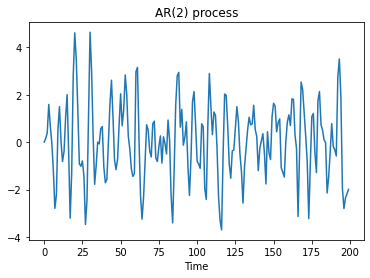

In [55]:
plt.plot(x)
plt.xlabel('Time')
plt.title('AR(%s) process'%k)
plt.show()

# Coding Fourier transform from scratch

Just using numpy! It isn't that complicated. It can be explicated using this pseudocode:


loop over N points/frequencies (looping index f)
  -  Create complex sine wave with length of signal, and frequency of looping index.

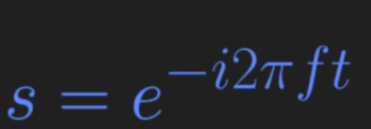

  -  Compute dot product between complex sine wave and signal.

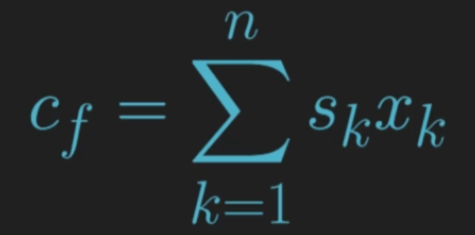

And then... we can extract:
- Amplitude, which is magnitude of Fourier coefficients.
- Phase, which is angle of Fourier coefficients.

In [56]:
# creating the for loop

# defining time vector
t = np.arange(N) / N    # normalized

# initializing Fourier coefficients
fc = np.zeros(N, dtype=complex)

# manual Fourier transform
for f in range(N):
  # create the complex sine wave
  csw = np.exp(-1j * 2 * np.pi * f * t) # "i", in python, is "1j"

  # compute the dot product between sine wave and the signal
  # fourier coefficient
  fc[f] = np.dot(csw, x)

In [57]:
fc # here we can see that for each number, we have real part and the imaginary part

array([ 8.57283587e+00+0.00000000e+00j,  3.44942937e+00-9.47486688e-01j,
       -1.49197449e+01+1.58978322e+00j, -2.04353569e+01-3.31222823e+00j,
        7.18505294e+00+3.00087902e+00j, -1.44247467e+01-1.56525787e+01j,
       -1.84623503e+01+1.19477385e+01j, -5.20663369e+00+1.74139839e+01j,
       -1.82408352e+00+1.03953234e+00j,  1.66331841e+00-4.62386756e+00j,
       -1.36436881e+01+8.57729318e+00j,  2.17933494e+01+1.17333624e+01j,
       -2.04242209e+00-2.04461723e+01j,  8.24979225e+00+6.89028682e+00j,
       -3.37397438e+01-1.58116058e+01j, -2.80817255e+01-4.08650653e+01j,
       -2.98172156e+00+2.87401538e+00j, -2.98021557e+01-8.61829471e+00j,
        2.05366563e+01-2.30705563e-01j,  1.56901361e+01-3.94326299e+01j,
        6.69077827e+01-2.35420288e+01j, -9.30379431e+00-5.45991461e+01j,
        7.20072088e-01+1.30570059e+01j, -2.26449722e+01-2.60231103e+01j,
       -2.82641235e+01-5.92349965e+01j,  1.35141999e-01+2.54827397e+01j,
        1.65071711e+00+1.99098531e+01j,  5.66681359

In [58]:
# now using FFT function (fast fourier transform), which is much faster
fc2 = np.fft.fft(x)
fc2 # the same as the above

array([ 8.57283587e+00+0.00000000e+00j,  3.44942937e+00-9.47486688e-01j,
       -1.49197449e+01+1.58978322e+00j, -2.04353569e+01-3.31222823e+00j,
        7.18505294e+00+3.00087902e+00j, -1.44247467e+01-1.56525787e+01j,
       -1.84623503e+01+1.19477385e+01j, -5.20663369e+00+1.74139839e+01j,
       -1.82408352e+00+1.03953234e+00j,  1.66331841e+00-4.62386756e+00j,
       -1.36436881e+01+8.57729318e+00j,  2.17933494e+01+1.17333624e+01j,
       -2.04242209e+00-2.04461723e+01j,  8.24979225e+00+6.89028682e+00j,
       -3.37397438e+01-1.58116058e+01j, -2.80817255e+01-4.08650653e+01j,
       -2.98172156e+00+2.87401538e+00j, -2.98021557e+01-8.61829471e+00j,
        2.05366563e+01-2.30705563e-01j,  1.56901361e+01-3.94326299e+01j,
        6.69077827e+01-2.35420288e+01j, -9.30379431e+00-5.45991461e+01j,
        7.20072088e-01+1.30570059e+01j, -2.26449722e+01-2.60231103e+01j,
       -2.82641235e+01-5.92349965e+01j,  1.35141999e-01+2.54827397e+01j,
        1.65071711e+00+1.99098531e+01j,  5.66681359

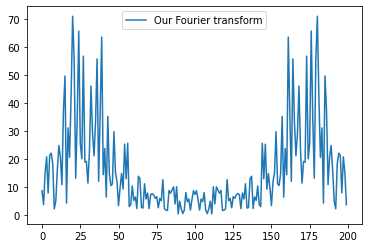

In [59]:
plt.plot(np.abs(fc), label='Our Fourier transform')
plt.legend()
plt.show()

The negatives frequencies are mirroring the positives frequencies. We don't need the negative frequencies. Let's isolate.

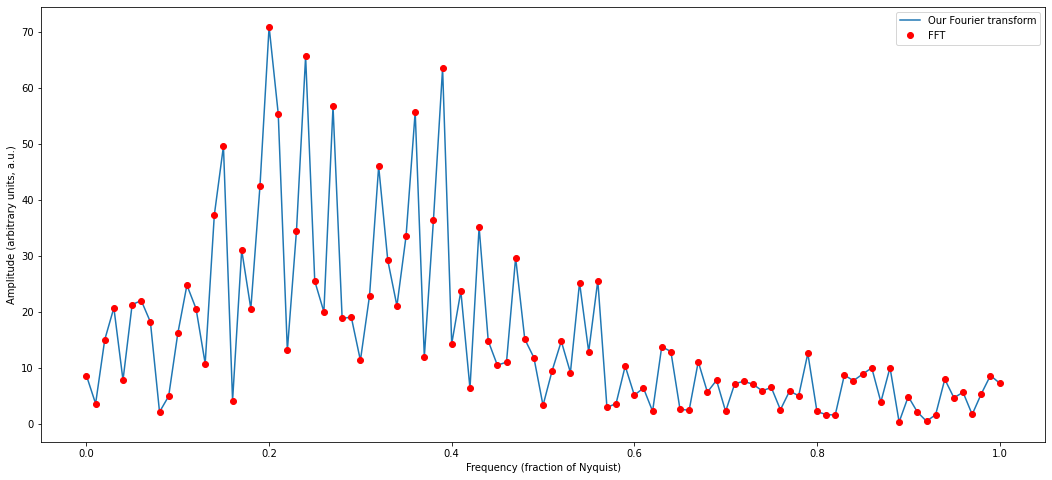

In [60]:
hz = np.linspace(0, 1, int(N / 2 + 1))

plt.figure(figsize=[18, 8])
plt.plot(hz, np.abs(fc[:len(hz)]), label='Our Fourier transform')
plt.plot(hz, np.abs(fc2[:len(hz)]), 'ro', label='FFT')
plt.legend()
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (arbitrary units, a.u.)')
plt.show()

# Zero-padding the FFT

Zero padding = pad time series signals with zeros. In other words, adding a bunch of zeroes after time series signal.

There are several advantages of zero-padding:
- it smooths out the signal representation in the frequency domain. Look in the graphs below, specially the green lines. It's zero-padded, and smoother than 21-point FT (without zero-padding):

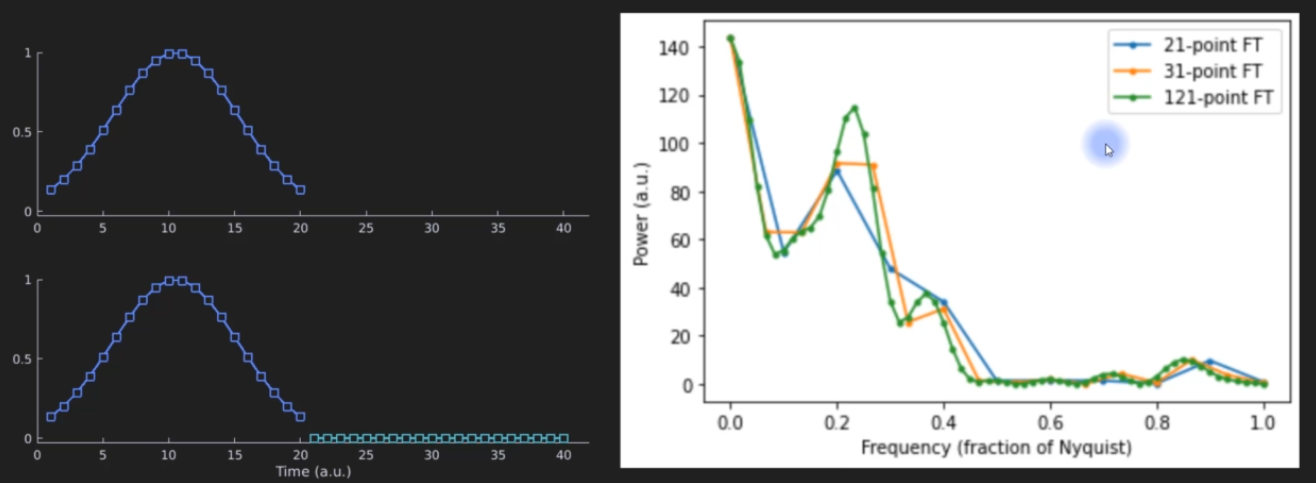

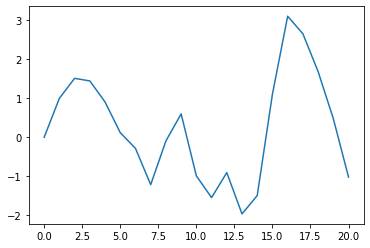

In [61]:
alpha = np.array([-.6, .9])
k = len(alpha)
N = 21 # same as the example above
x = np.zeros(N)

# adding some sine wave aspect
x += np.sin(np.linspace(0, 10 * np.pi, N))

for i in range(k, N):          # this is the Epsilon part
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()
         # this will get value of X from current index minus "k" up through index, and it's going to be multiplied by alpha (two element vector), and sum this together

plt.plot(x)

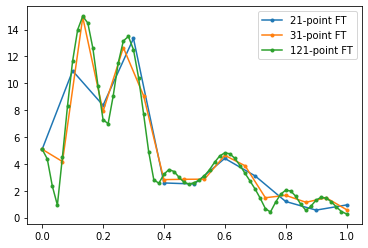

In [62]:
for i in range(3): # three different levels of zero-padding

  # specify the number of FFT points (including zero-padding)
  nfft = N + 10**i * int(i!=0)   # N + 1... 10... 100

  # compute FFT
  xX = np.fft.fft(x, n=nfft) # the "n" parameter tells python if it need to be zero-padded or not, by comparing with N
  
  # compute HZ vector
  hz = np.linspace(0, 1, int(nfft/2+1))

  # plot the amplitude spectrum
  plt.plot(hz, np.abs(xX[:len(hz)]), '.-', label='%s-point FT'%nfft)


plt.legend()
plt.show() 

# Full (or static) FFT method

Welch was a mathematician, and published this method around 60s.

Welches method is used to deal with signals that are non stationary signals, that change a lot in their characteristics over time, like this signal shown below.

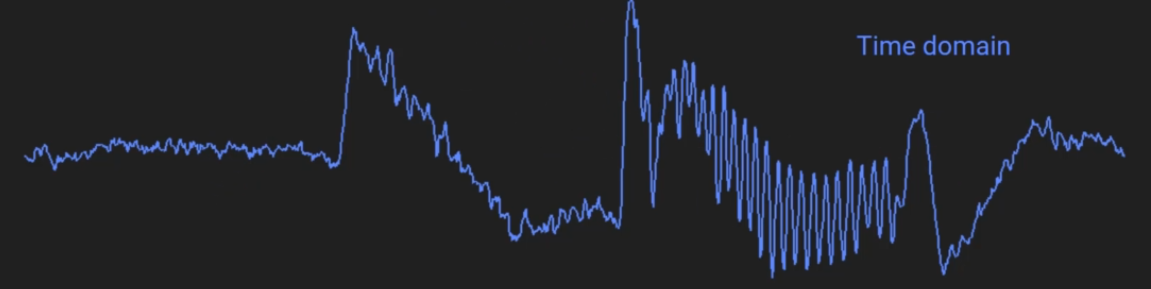

The idea is to take a snippet of data, a little piece of data, and then perform the Fourier Transform on this snippet. And then take the next snippet (which can be overlapping), and Fourier Transform again, repeating along the signal.

An entire signal then will have many different signals, different power spectra/amplitude spectra, that averages will be calculated, to give one average spectrum.

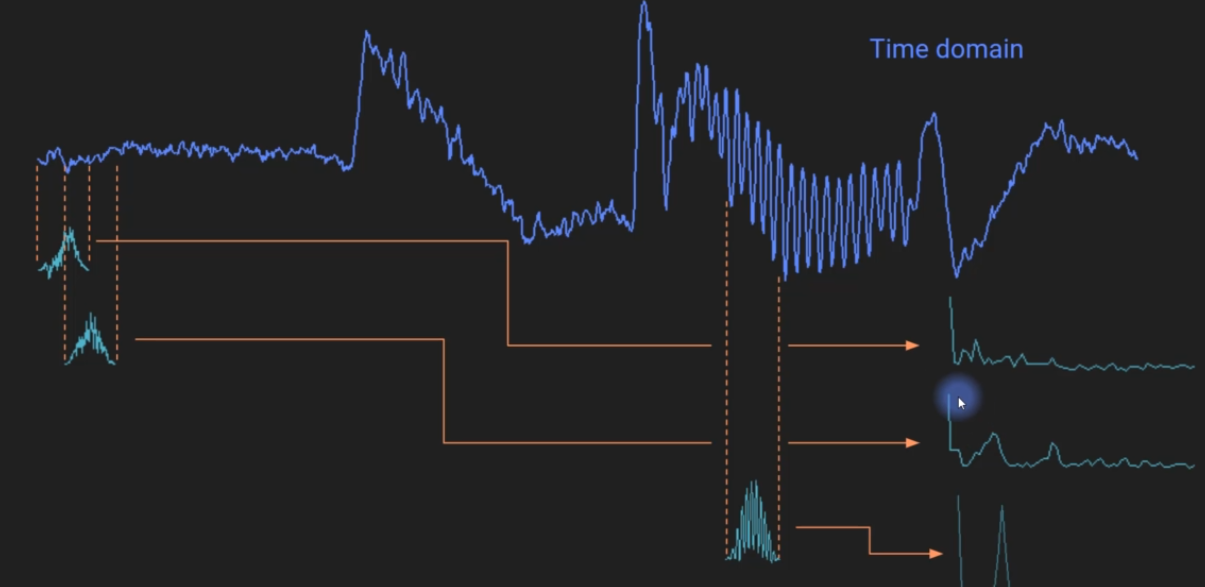

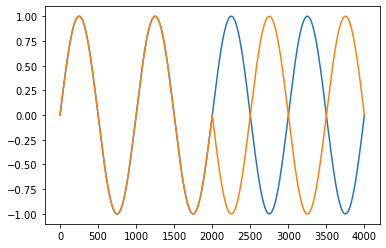

In [63]:
# generating the signals

N = 2000
t = np.linspace(0, 4 * np.pi, N)

signal1 = np.concatenate((np.sin(t), np.sin(t)))
signal2 = np.concatenate((np.sin(t), -np.sin(t)))

plt.plot(signal1)
plt.plot(signal2)
plt.show()

In [64]:
# "static" FFT

staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)
staticHz = np.linspace(0, 1, int(len(signal1) / 2+1))

In [74]:
# Welch's method
from scipy.signal import welch

dynamicHz, dynamicX1 = welch(signal1, nfft=N)
dynamicHz, dynamicX2 = welch(signal2, nfft=N)

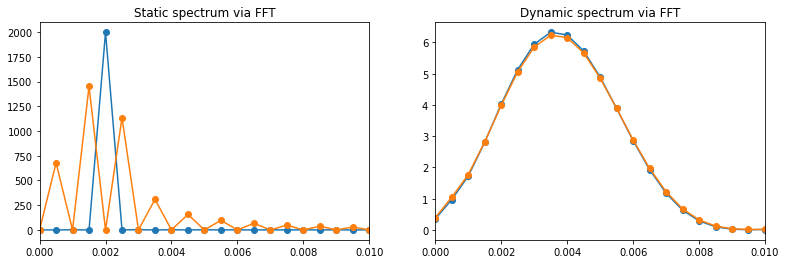

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# static FFT
ax[0].plot(staticHz, np.abs(staticX1[:len(staticHz)]), '-o', label='Signal 1')
ax[0].plot(staticHz, np.abs(staticX2[:len(staticHz)]), '-o', label='Signal 2')
ax[0].set_xlim([0, .01])
ax[0].set_title('Static spectrum via FFT')

# welch's method
ax[1].plot(dynamicHz, np.abs(dynamicX1[:len(dynamicHz)]), '-o', label='Signal 1')
ax[1].plot(dynamicHz, np.abs(dynamicX2[:len(dynamicHz)]), '-o', label='Signal 2')
ax[1].set_xlim([0, .01])
ax[1].set_title('Dynamic spectrum via FFT')

plt.show()

Why in Dynamic spectrum these two signals look so similar to each other? And why in static spectrum they look so contrastant?

If we get the graph we generate earlier, the signals get a perfect phase reversal that goes halfway through. In static FFT, when comparing to a sine wave, you will get a positive correlation with one sine wave, and a negative correlation with the other, and they cancel each other.

In welches, they strongly correlate in averaging small parts of the signal.

# Spectrogram

Let's explore a spectrogram (time frequency representation) of this signal created above (the flipped sine wave).

In time frequency analysis, we can look at changes in the spectral features of the signal over time.

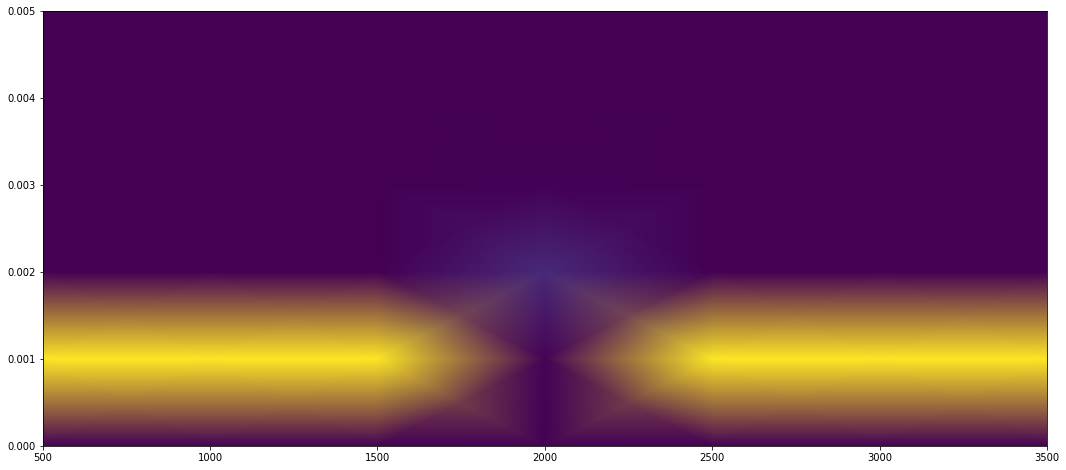

In [83]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(signal2, noverlap=500, nperseg=1000) # nperseg -> we are setting a number of data points per segment

plt.figure(figsize=[18, 8])
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim([0, .005])
plt.show()